In [ ]:
__author__ = "Elliot Simon"
__credits__ = ["DTU-Risø", "Guillaume Lea", "Mike Courtney"]
__email__ = "ellsim@dtu.dk"
__license__ = "Exercise released under GNU GPL v3.0. Measurement data use is only granted for the purpose of the exercice. Please contact the author if you woud like additional rights"

# Experiment overview

<font size=4>
This exercise uses real wind lidar data from the WAFFLE experiement conducted at DTU-Risø by Elliot and Guillaume. <br />
The system is a Leosphere WindCube 400S running DTU's WindScanner software. <br />
Measurements are delivered in the same raw data format as we obtained. <br />
The lidar was configured to scan horizontally (PPI, or sector scans) at a 3 degree elevation angle. <br />
A met-mast is positioned approximately 300m west of the lidar. <br />
Follow along with the tutorial and feel free to modify/extend anything you want!
</font>

![Experiment overview](./experiment-overview.png)

![Experiment close up](./experiment-closeup.png)

![Field photo](./field-photo.png)

# Initialization / Configuration

In [1]:
# Import modules needed
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
import ipywidgets as widgets

In [2]:
# Set plotting preferences

%matplotlib inline
# %matplotlib notebook

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.formatter.useoffset'] = False

fmt = DateFormatter('%D %H:%M:%S')

# File Loading

In [3]:
# Set path to folder where our data is stored
filepath = './/20170409113034_PPI1'

In [4]:
%%time
# Reads all wind_data files inside directory
all_files = glob.glob(filepath + "/*_wind.txt")
all_files.sort()
print("\n".join(all_files))

df_ws = pd.concat((pd.read_csv(f, sep=';', header=None, usecols=[*range(1,136)], index_col=0) for f in all_files))

.//20170409113034_PPI1\20170409114000_wind.txt
.//20170409113034_PPI1\20170409115000_wind.txt
.//20170409113034_PPI1\20170409120000_wind.txt
.//20170409113034_PPI1\20170409121000_wind.txt
.//20170409113034_PPI1\20170409122000_wind.txt
.//20170409113034_PPI1\20170409123000_wind.txt
.//20170409113034_PPI1\20170409124000_wind.txt
.//20170409113034_PPI1\20170409125000_wind.txt
.//20170409113034_PPI1\20170409130000_wind.txt
.//20170409113034_PPI1\20170409131000_wind.txt
.//20170409113034_PPI1\20170409132000_wind.txt
.//20170409113034_PPI1\20170409133000_wind.txt
.//20170409113034_PPI1\20170409134000_wind.txt
.//20170409113034_PPI1\20170409135000_wind.txt
.//20170409113034_PPI1\20170409140000_wind.txt
.//20170409113034_PPI1\20170409141000_wind.txt
.//20170409113034_PPI1\20170409142000_wind.txt
.//20170409113034_PPI1\20170409143000_wind.txt
.//20170409113034_PPI1\20170409144000_wind.txt
.//20170409113034_PPI1\20170409145000_wind.txt
.//20170409113034_PPI1\20170409150000_wind.txt
.//2017040911

In [5]:
# Take a look at the data before processing
df_ws.head()

,2,3,4,5,6,7,8,9,10,11,...,126,127,128,129,130,131,132,133,134,135
1,,,,,,,,,,,,,,,,,,,,,
0,0,102,3.574582e+09,3.574582e+09,241.483,2.949,288,-10.931,-32.598,0.363,...,-33.083,0.346,9300,14.071,-30.211,0.985,9600,-10.744,-32.914,0.491
1,139,152,3.574582e+09,3.574582e+09,244.483,2.950,288,-27.116,-32.630,9.599,...,-32.109,0.457,9300,-18.251,-34.050,9.599,9600,-18.451,-32.840,0.207
2,192,202,3.574582e+09,3.574582e+09,247.483,2.950,288,20.903,-31.298,0.491,...,-32.992,0.491,9300,24.734,-33.548,0.277,9600,21.631,-31.789,0.939
3,230,240,3.574582e+09,3.574582e+09,250.482,2.950,288,3.041,-30.782,0.731,...,-33.112,0.016,9300,2.959,-31.171,0.446,9600,3.033,-31.044,0.822
4,257,265,3.574582e+09,3.574582e+09,253.482,2.950,288,-0.280,-31.826,0.066,...,-31.463,0.930,9300,-14.652,-31.538,0.413,9600,15.117,-31.461,0.985


# Pre-processing

In [6]:
# Define a function to convert from LabVIEW time to datetime object (originally UTC format, add 1 hour to match local time)
def convtime(labviewtime):
    unixtime = labviewtime - 2082844800
    timestamp = datetime.datetime.utcfromtimestamp(int(unixtime)) + pd.Timedelta(hours=1)
    return timestamp

In [7]:
# Apply the time conversion to the column holding the timestamps (end of LOS measurement)
# Set the index to the new datetime object, and sort to ensure the time series is naturally ordered
df_ws['dt_stop'] = df_ws[5].apply(lambda x: convtime(x))
df_ws.set_index(['dt_stop'], inplace=True)
df_ws.sort_index(inplace=True)

In [8]:
# For ease of use, reindex the column numbers, and rename the azimuth and elevation columns
df_ws.columns = range(0,len(df_ws.columns))
df_ws.rename(columns = {4:'azim'}, inplace=True)
df_ws.rename(columns = {5:'elev'}, inplace=True)

In [9]:
# Again, inspect the structure of our data
df_ws.head()

,0,1,2,3,azim,elev,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
dt_stop,,,,,,,,,,,,,,,,,,,,,
2017-04-09 12:30:36,0,102,3.574582e+09,3.574582e+09,241.483,2.949,288,-10.931,-32.598,0.363,...,-33.083,0.346,9300,14.071,-30.211,0.985,9600,-10.744,-32.914,0.491
2017-04-09 12:30:37,139,152,3.574582e+09,3.574582e+09,244.483,2.950,288,-27.116,-32.630,9.599,...,-32.109,0.457,9300,-18.251,-34.050,9.599,9600,-18.451,-32.840,0.207
2017-04-09 12:30:38,192,202,3.574582e+09,3.574582e+09,247.483,2.950,288,20.903,-31.298,0.491,...,-32.992,0.491,9300,24.734,-33.548,0.277,9600,21.631,-31.789,0.939
2017-04-09 12:30:39,230,240,3.574582e+09,3.574582e+09,250.482,2.950,288,3.041,-30.782,0.731,...,-33.112,0.016,9300,2.959,-31.171,0.446,9600,3.033,-31.044,0.822
2017-04-09 12:30:40,257,265,3.574582e+09,3.574582e+09,253.482,2.950,288,-0.280,-31.826,0.066,...,-31.463,0.930,9300,-14.652,-31.538,0.413,9600,15.117,-31.461,0.985


In [10]:
# Pull out a list of the measured range gates
range_gates = df_ws.iloc[0,6::4].tolist()

In [11]:
# Define a function to relate a given range gate to its corresponding column number
def get_rg_col(rg, rg_list=range_gates):
    '''
    Returns column position of specified range gate (provided in meters)

    Note that this gives the base column position for the 4-set (distance, radial_speed, cnr, dispersion)
    So you need to add 1, 2, or 3 to this result for selecting the corresponding measurement
    '''
    return rg_list.index(rg) * 4 + 6

In [12]:
# Test on the first & last range gate
print(get_rg_col(range_gates[0]))
print(get_rg_col(range_gates[-1]))

6
130


## Quality Control

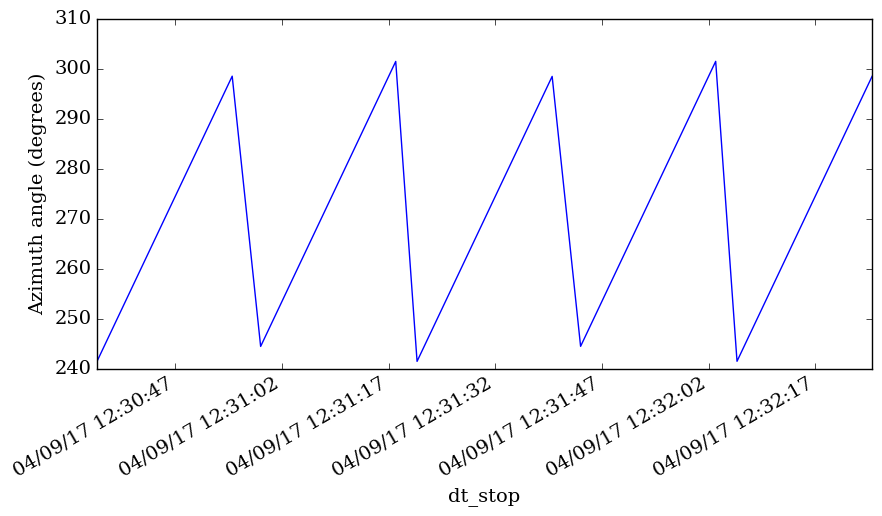

In [13]:
# Inspect the first 100 azimuth values to better understand the scanning pattern
ax = df_ws['azim'].iloc[0:100].plot()
ax.xaxis.set_major_formatter(fmt)
plt.ylabel('Azimuth angle (degrees)');

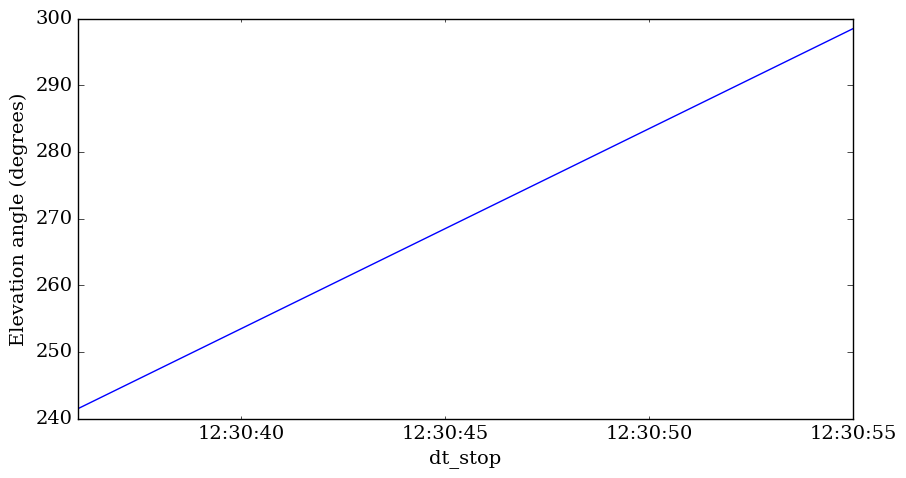

In [14]:
# There are 20 rows for each scan before it resets
df_ws['azim'].iloc[0:20].plot()
plt.ylabel('Elevation angle (degrees)')
n_los_scan = 20

In [15]:
# Pull out a list of the azimuth angles (this scenario stays the same)
# Convert to radians for use in plotting on polar axis
azims = df_ws.iloc[0:20]['azim'].tolist()
azims_rad = np.radians(azims)

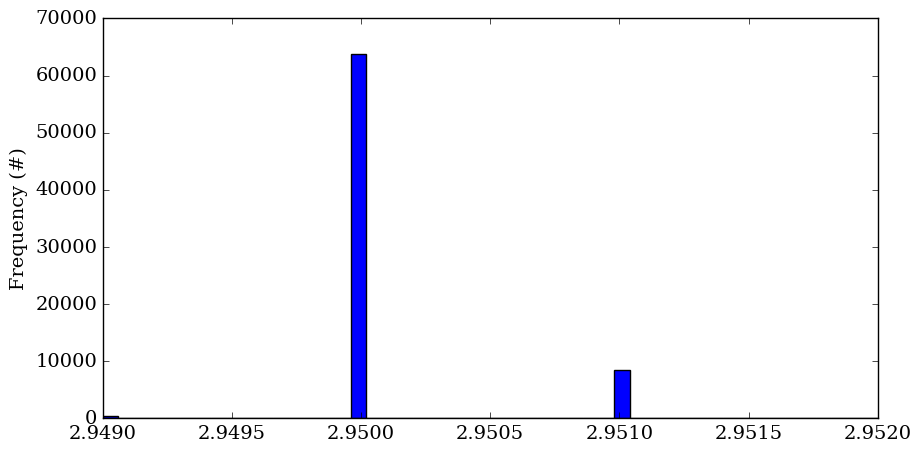

In [16]:
# Check the distribution of elevation angles
# Values should all be +/- 0.5 degrees (the angle is not changed in this scenario)
plt.hist(df_ws['elev'], 50)
plt.ylabel('Frequency (#)');

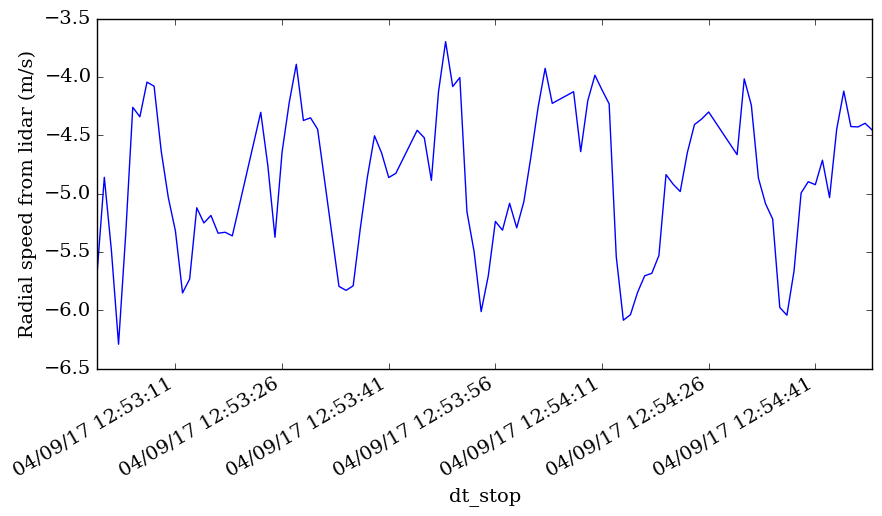

In [17]:
# Inspect the radial speed pattern (should resemble a partial cosine)
dist = range_gates[1]
ax = df_ws.iloc[1200:1300, get_rg_col(dist)+1].plot()
plt.ylabel('Radial speed from lidar (m/s)')
ax.xaxis.set_major_formatter(fmt)

# Filtering

In [18]:
# Loops through list of range gates and applies filters 
for dist in range_gates:
    rg = get_rg_col(dist)
    # column position + 2 = CNR column. This filters low signal
    mask = df_ws[rg+2] < -27
    df_ws.loc[mask, rg+1] = np.nan
    
#    column position + 2 = CNR column. This filters high signal (object/hard target)
#    mask = df_ws[rg+2] > 0
#    df_ws.loc[mask, rg+1] = np.nan

# Scan Plotting

In [19]:
# Define a function to handle our plotting calls
# Everything is in polar to avoid interpolation steps required to convert to a Cartesian system. 
def plot_ppi(n=0, cmap='seismic', vmin=-25, vmax=25, scalestep=0.1):
    r, theta = np.meshgrid(range_gates, azims_rad)

    df_scan = df_ws.iloc[n*20:n*20+20]
    timestamp = df_scan.last_valid_index()

    values = df_scan.iloc[:,7::4]

    f = plt.figure(figsize=(10, 10))  # Size
    ax = plt.subplot(111, polar=True)  # Create subplot

    pp = plt.contourf(theta, r, values, vmin=vmin, vmax=vmax, cmap=cmap, levels=np.arange(vmin,vmax,scalestep))
    ax.set_theta_zero_location("N")
    ax.set_thetamin(min(azims))
    ax.set_thetamax(max(azims))
    cbar = plt.colorbar(pp, orientation='vertical')
    cbar.ax.set_ylabel('radial speed (m/s)', rotation=270)
    plt.grid(color='#888888')
    ax.grid(True)
    ax.set_theta_direction(-1)
    ax.spines['polar'].set_visible(False)
    plt.title('WAFFLE PPI Plot' + '\n' + str(timestamp), fontsize=18)

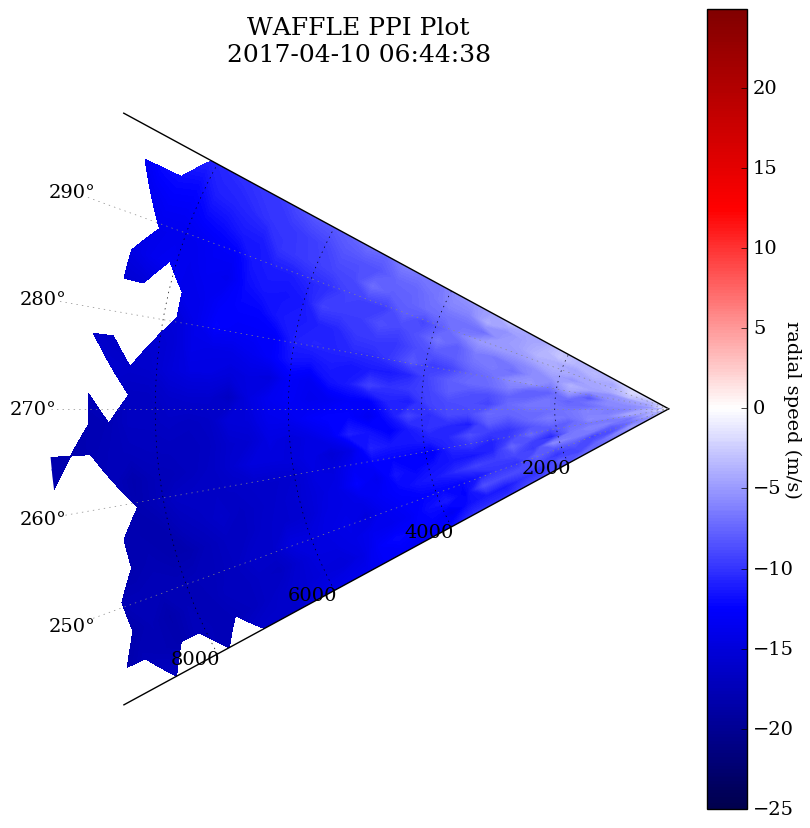

In [20]:
# Look at any random scan
plot_ppi(2930)

In [21]:
# Create a widget to view the scans
# The widget ui has play controls, a slider to select the scan, a dropdown to select a colormap,
# And (floating point) inputs to control the colorscale limits and step-size

n_max = int(len(df_ws)/20)-1
play = widgets.Play(value=0, min=0, max=n_max, step=1, speed=0.1)
slider = widgets.IntSlider(value=0, min=0, max=n_max, step=1)
link = widgets.jslink((play, 'value'), (slider, 'value'))
cmap = widgets.Dropdown(options=plt.colormaps(), value='seismic', description='cmap')
vmin = widgets.FloatText(value=-25, description='vmin')
vmax = widgets.FloatText(value=25, description='vmax')
scalestep = widgets.FloatText(value=0.5, description='scalestep', step=0.1)
out = widgets.interactive_output(plot_ppi, {'n':play, 'cmap':cmap, 'vmin':vmin, 'vmax':vmax, 'scalestep':scalestep});
top_box = widgets.HBox([play, slider, cmap])
bottom_box = widgets.HBox([vmin, vmax, scalestep])
ui = widgets.VBox([top_box, bottom_box])

display(ui, out)

A Jupyter Widget

A Jupyter Widget

# Horizontal wind vector retrieval

<font size=4>
Here we implement the integrated Velocity Azimuth Process (iVAP) introduced in <a href='https://journals.ametsoc.org/doi/abs/10.1175/JTECH2047.1'>
Liang (2007) </a> which assumes a uniform wind flow within the scanned volume and fits the radial wind speeds to a cosine in order to obtain horizontal wind components. Another assumption is that there is no vertical motion. <br />
The vector components are then converted to scaler wind speed and direction.
</font>

$
\Large{
u = \frac{(\sum_{\theta_{start}}^{\theta_{stop}} (rs*\cos \theta ) * \sum_{\theta_{start}}^{\theta_{stop}} (\sin^2 \theta ) )- (\sum_{\theta_{start}}^{\theta_{stop}} (rs*\sin \theta ) * \sum_{\theta_{start}}^{\theta_{stop}} (\cos \theta  * \sin \theta ))}
{((\sum_{\theta_{start}}^{\theta_{stop}} \cos^2 \theta )*\sum_{\theta_{start}}^{\theta_{stop}} \sin^2 \theta  )) - (\sum_{\theta_{start}}^{\theta_{stop}} (\cos \theta  * \sin \theta ))^2)}
}
$

$
\Large{
v = \frac{(\sum_{\theta_{start}}^{\theta_{stop}} (rs*\sin \theta ) * \sum_{\theta_{start}}^{\theta_{stop}} (\cos^2 \theta ) )- (\sum_{\theta_{start}}^{\theta_{stop}} (rs*\cos \theta ) * \sum_{\theta_{start}}^{\theta_{stop}} (\cos \theta  * \sin \theta ))}
{((\sum_{\theta_{start}}^{\theta_{stop}} \cos^2 \theta )*\sum_{\theta_{start}}^{\theta_{stop}} \sin^2 \theta )) - (\sum_{\theta_{start}}^{\theta_{stop}} (\cos \theta  * \sin \theta ))^2)}
}
$

$
\Large{
V_h = \sqrt{u^2 + v^2}
}
$

$
\Large{
dir = atan2\: (v,u) + offset
}
$

In [22]:
# Note that this function is not designed for speed but ease of readability
def calc_u(df_scan):
    '''Calculate u component of the horizontal wind speed vector using iVAP reconstruction method on a single PPI scan'''
    sum1u, sum2u, sum3u, sum4u, sum5u, sum6u, sum7u = [], [], [], [], [], [], []
    for index, row in df_scan.iterrows():
        sum1u.append(df_scan.at[index, 'rs'] * np.cos(np.radians(df_scan.at[index, 'azim'])))
        sum2u.append(np.power(np.sin(np.radians(df_scan.at[index, 'azim'])), 2))
        sum3u.append(df_scan.at[index, 'rs'] * np.sin(np.radians(df_scan.at[index, 'azim'])))
        sum4u.append(np.cos(np.radians(df_scan.at[index, 'azim'])) * np.sin(np.radians(df_scan.at[index, 'azim'])))
        sum5u.append(np.power(np.cos(np.radians(df_scan.at[index, 'azim'])), 2))
        sum6u.append(np.power(np.sin(np.radians(df_scan.at[index, 'azim'])), 2))
        sum7u.append(np.cos(np.radians(df_scan.at[index, 'azim'])) * np.sin(np.radians(df_scan.at[index, 'azim'])))
        
       # print(sum1u)
        
    u = ((np.sum(sum1u) * np.sum(sum2u)) - (np.sum(sum3u) * np.sum(sum4u))) / ((np.sum(sum5u) * np.sum(sum6u)) - (np.power(np.sum(sum7u), 2)))
    return u

In [23]:
# Note that this function is not designed for speed but ease of readability
def calc_v(df_scan):
    '''Calculate v component of the horizontal wind speed vector using iVAP reconstruction method on a single PPI scan'''
    sum1v, sum2v, sum3v, sum4v, sum5v, sum6v, sum7v = [], [], [], [], [], [], []
    for index, row in df_scan.iterrows():
        sum1v.append(df_scan.at[index, 'rs'] * np.sin(np.radians(df_scan.at[index, 'azim'])))
        sum2v.append(np.power(np.cos(np.radians(df_scan.at[index, 'azim'])), 2))
        sum3v.append(df_scan.at[index, 'rs'] * np.cos(np.radians(df_scan.at[index, 'azim'])))
        sum4v.append(np.cos(np.radians(df_scan.at[index, 'azim'])) * np.sin(np.radians(df_scan.at[index, 'azim'])))
        sum5v.append(np.power(np.cos(np.radians(df_scan.at[index, 'azim'])), 2))
        sum6v.append(np.power(np.sin(np.radians(df_scan.at[index, 'azim'])), 2))
        sum7v.append(np.cos(np.radians(df_scan.at[index, 'azim'])) * np.sin(np.radians(df_scan.at[index, 'azim'])))
    v = ((np.sum(sum1v) * np.sum(sum2v)) - (np.sum(sum3v) * np.sum(sum4v))) / ((np.sum(sum5v) * np.sum(sum6v)) - (np.power(np.sum(sum7v), 2)))
    return v

In [24]:
def calc_hspeed(u, v):
    '''Calculate horizontal wind speed (scalar) from u & v components'''
    hspeed = (np.sqrt(np.power(u, 2) + np.power(v, 2)))
    return hspeed

In [25]:
def calc_dir(u, v, offset=180):
    '''Calculate wind direction (degrees) from u and v components. Applies provided offset, default = 180 degrees'''
    direction = np.degrees(np.arctan2(v, u)) + offset
    return direction

In [26]:
# Apply the fitting algorithm to the data
# This implementation only processes one range gate at a time
dist = range_gates[1] # Choose the range gate you want here

# Initialize our results container first (putting is faster than appending)
df_result = pd.DataFrame(columns=['dt', 'u', 'v', 'spd', 'dir'], index=np.arange(0,n_max+1,1), dtype=np.float64)
for count, los in enumerate(range(0, len(df_ws)-20, n_los_scan)):
    # Sub-select a single scan
    df_scan = df_ws.iloc[los:los+n_los_scan]
    # Get the timestamp of the last measurement within the scan
    timestamp = df_scan.index[-1]
    # Get the corresponding radial speeds and azimuth angles
    rs = df_scan.iloc[:,get_rg_col(dist)+1]
    az = df_scan.loc[:,'azim']
    # Concatenate together, rename columns, integer reindex to prevent possibility of multiple values with same timestamp
    scan = pd.concat([rs,az], axis=1).reset_index()
    scan.columns = ['dt', 'rs', 'azim']
    
    # Calculate u, v, speed & direction
    u = calc_u(scan)
    v = calc_v(scan)
    spd = calc_hspeed(u,v)
    direction = calc_dir(u,v)
    # Concatenate results together
    result = [timestamp, u, v, spd, direction]
    # Insert into dataframe
    df_result.iloc[count] = result

# Set the timestamp as our index
df_result.set_index('dt', inplace=True)
# Drop any rows with all NaNs
df_result.dropna(how='all', inplace=True)
print('Length of data processed: ' + str(df_result.last_valid_index() - df_result.first_valid_index()))

Length of data processed: 0 days 22:34:38


In [27]:
df_result.head()

,u,v,spd,dir
dt,,,,
2017-04-09 12:31:18,-0.157470,5.612700,5.614909,271.607067
2017-04-09 12:31:40,-0.295927,5.475840,5.483830,273.093382
2017-04-09 12:32:03,-0.292316,5.420762,5.428638,273.086698
2017-04-09 12:32:25,-0.254777,5.452199,5.458149,272.675442
2017-04-09 12:32:47,-0.958197,5.414283,5.498418,280.036053


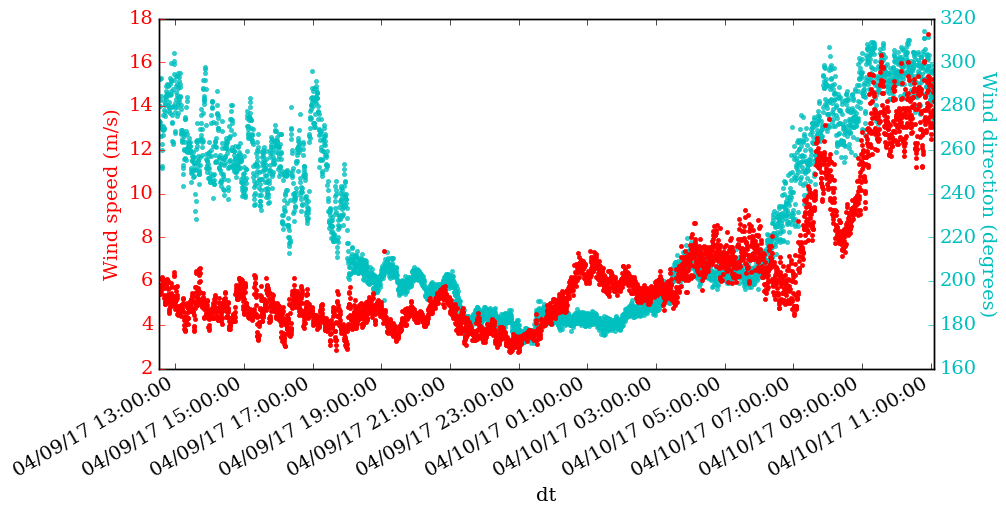

In [28]:
# Plot time series of result for both speed and direction
ax = df_result['spd'].plot(c='r', marker='.', linewidth=0, zorder=0)
plt.ylabel('Wind speed (m/s)', color='r')
ax.tick_params('y', colors='r')
ax2 = ax.twinx()
df_result['dir'].plot(ax=ax2, c='c', alpha=0.8, marker='.', linewidth=0, zorder=1)
ax2.xaxis.set_major_formatter(fmt)
ax2.tick_params('y', colors='c')
plt.ylabel('Wind direction (degrees)', rotation=270, color='c')
ax2.yaxis.set_label_coords(1.08,0.5)
ax.set_zorder(1)
ax.patch.set_visible(False)

# Mast Comparison

In [29]:
# Load in previously prepared mast data- 35 Hz sonic measurements which were smoothed (using a 22s moving average) 
# to match the lidar scan rate and then resampled to 1s resolution
df_mast = pd.read_hdf('201704090000_201704110000_22Sroll_1Sres.hdf', 'df')

In [30]:
# Inspect the data available
df_mast.columns

Index(['SWsp_70m', 'Sdir_70m', 'SWsp_44m', 'Sdir_44m', 'SWsp_18m', 'Sdir_18m'], dtype='object')

In [31]:
# Join lidar and mast measurements together
df_joined = df_result.join(df_mast, how='inner')

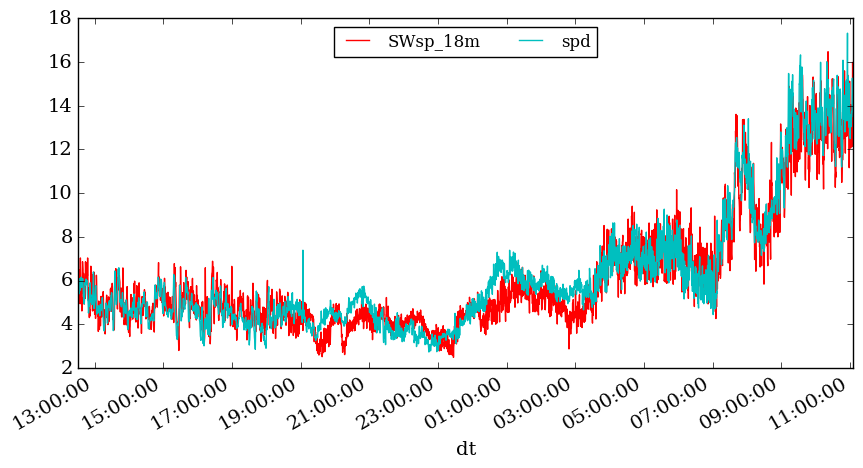

In [32]:
# Compare the time series between both instruments for wind speed
df_joined['SWsp_18m'].plot(c='r')
df_joined['spd'].plot(c='c')
plt.legend(loc='upper center', ncol=2, fontsize=12)

In [33]:
# Define a function for making scatterplots, including the reference line y=x
def plot_scatter(x, y, c, title):
    f, ax = plt.subplots(figsize=(5,5))
    plt.scatter(x, y, c=c)
    # Adds a line y=x to scatterplot
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()])]  # max of both axes 
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.title(str(title), fontsize=12, y=1.08)
    plt.tight_layout()

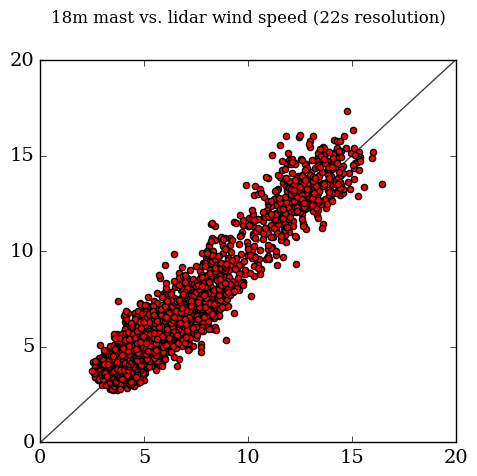

In [34]:
# Compare the lidar wind speed with the corresponding mast wind speed
plot_scatter(df_joined['SWsp_18m'], df_joined['spd'], c='r', title='18m mast vs. lidar wind speed (22s resolution)')

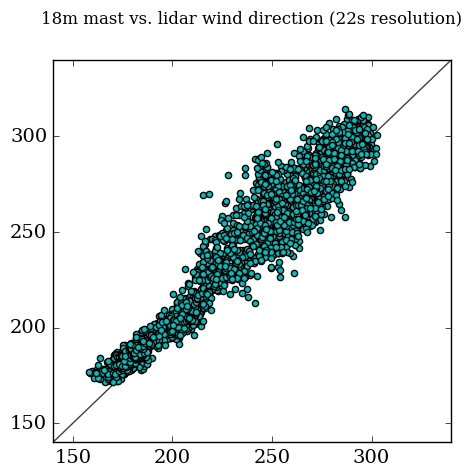

In [35]:
# Compare the lidar wind direction with the corresponding mast wind direction
plot_scatter(df_joined['Sdir_18m'], df_joined['dir'], c='c', title='18m mast vs. lidar wind direction (22s resolution)')

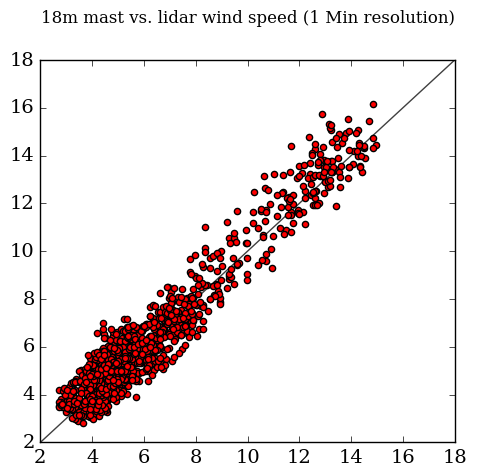

In [36]:
# Make the same wind speed plot, but using 1-minute averaged samples
plot_scatter(df_joined['SWsp_18m'].resample('1 Min').mean(), df_joined['spd'].resample('1 Min').mean(), c='r',
             title='18m mast vs. lidar wind speed (1 Min resolution)')

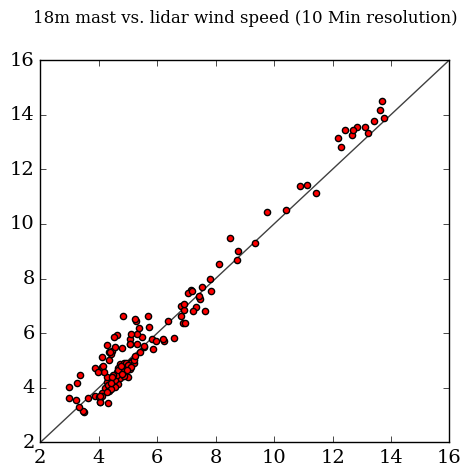

In [37]:
# Make the same wind speed plot, but using 10-minute averaged samples
plot_scatter(df_joined['SWsp_18m'].resample('10 Min').mean(), df_joined['spd'].resample('10 Min').mean(), c='r', 
             title='18m mast vs. lidar wind speed (10 Min resolution)')

<font size=4>
Try to see what else you can find in the data! Good luck and have fun :)
</font>